### DASC521: Intro to ML
### Homework 1: Multivariate Parametric Classification
### Gamze Keçibaş  
---
### CONTENT
- **Step 01.** Import Libraries    
- **Step 02.** Generate Random Data    
- **Step 03.** Parameter Estimation  
    - Calculate means    
    - Calculate covariances  
    - Calculate priors  
- **Step 04.** Calculate Confusion Matrix  
- **Step 05.** Plot Decision Boundaries    
    - Calculate Score Functions & Posteriors    
    - Plot Decision Boundaries & Errors    

### Step 01. Import Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(1)

### Step 02. Generate Random Data

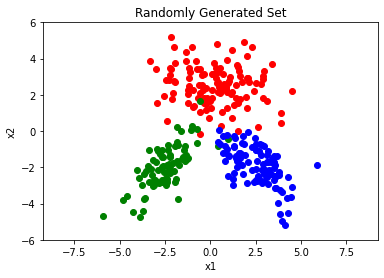

In [2]:
N= np.array([120, 80, 100])        # number of samples for three cases
mu1= [0.0, 2.5]                    # mean array of distributions
mu2= [-2.5, -2.0]
mu3= [2.5, -2.0]

sigma1= [[3.2, 0.0],[0.0, 1.2]]    # covariance matrix of distributions
sigma2= [[1.2, 0.8],[0.8, 1.2]]
sigma3= [[1.2, -0.8],[-0.8, 1.2]]

p1 = np.random.multivariate_normal(mu1, sigma1, N[0])    # randomly generated data points
p2 = np.random.multivariate_normal(mu2, sigma2, N[1])
p3 = np.random.multivariate_normal(mu3, sigma3, N[2])
X = np.vstack((p1,p2,p3))

Y= np.concatenate((np.repeat(1, N[0]), np.repeat(2, N[1]), np.repeat(3, N[2])))   # labels of data points

plt.Figure()
plt.plot(p1.T[0], p1.T[1],'ro')
plt.plot(p2.T[0], p2.T[1],'go')
plt.plot(p3.T[0], p3.T[1],'bo')
plt.axis('equal')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.xlabel('x1'), plt.ylabel('x2'), plt.title('Randomly Generated Set')
plt.show()

### Step 03. Parameter Estimation
#### Calculate means

In [3]:
K= np.max(Y)
n= X.shape[0]

sample_means= [np.mean(X[Y == (c+1)], axis=0) for c in range(K)]
for i in range(len(sample_means)):
    print(f'Class [{i+1}]:')
    print(sample_means[i])

Class [1]:
[0.26563078 2.52716835]
Class [2]:
[-2.47809683 -1.95300192]
Class [3]:
[ 2.56009664 -1.90556717]


#### Calculate Covariances

In [4]:
sample_covs= [np.dot((X[Y== c+1] - sample_means[c]).T,(X[Y== c+1] - sample_means[c]))/N[c] for c in range(K)]

#### Calculate Priors 

In [5]:
class_priors= [np.mean(Y== (c+1)) for c in range(K)]
class_priors
sum(class_priors)

for m in range(len(class_priors)):
    print(f'Prior probability of Class [{m+1}]: ', class_priors[m])
print('\nTotal probability= ', sum(class_priors))

Prior probability of Class [1]:  0.4
Prior probability of Class [2]:  0.26666666666666666
Prior probability of Class [3]:  0.3333333333333333

Total probability=  1.0


### Step 04. Calculate Confusion Matrix

In [6]:
y_pred = []
for i in range(X.shape[0]):
    scores = [-K/2*np.log(2*np.pi) -1/2*np.log(np.linalg.det(sample_covs[c])) -1/2 * np.dot(np.dot(X[i] 
            - sample_means[c], np.linalg.inv(sample_covs[c])), X[i] - sample_means[c].T) + np.log(class_priors[c]) for c in range(K)]
    y_pred.append(np.argmax(scores)+1)
y_pred = np.array(y_pred)

CM = pd.crosstab(y_pred, Y, rownames = ['y_pred'], colnames = ['y_truth'])
print('Confusion Matrix of the prediction:\n')
print(CM)

Confusion Matrix of the prediction:

y_truth    1   2    3
y_pred               
1        116   1    0
2          1  77    0
3          3   2  100


### Step 05. Plot Decision Boundaries

#### Calculate Score Functions & Posteriors

In [7]:
Wc = np.array([-0.5 * np.linalg.inv(sample_covs[c]) for c in range(K)])
wc = np.array([np.matmul(np.linalg.inv(sample_covs[c]), sample_means[c]) for c in range(K)])
wc0 = np.array([-(np.matmul(np.matmul(np.transpose(sample_means[c]), 0.5* np.linalg.inv(sample_covs[c])), sample_means[c])) 
                - 0.5 * np.log(np.linalg.det(sample_covs[c])) 
                + np.log(class_priors[c]) 
                for c in range(K)])


x1_interval = np.linspace(-6, +6, 1201)
x2_interval = np.linspace(-6, +6, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((K, len(x1_interval), len(x2_interval)))

for c in range(K):
    discriminant_values[c, :, :] = (Wc[c, 0, 0] * x1_grid ** 2) + (Wc[c, 0, 1] * x1_grid * x2_grid) + (wc[1, 0] * x2_grid * x1_grid) + (wc[1, 1] * x2_grid ** 2) + (wc[c, 0] * x1_grid) + (wc[c, 1] * x2_grid) + wc0[c]
C1 = discriminant_values[0, :, :]
C2 = discriminant_values[1, :, :]
C3 = discriminant_values[2, :, :]
C1[(C1 < C2) & (C1 < C3)] = np.nan
C2[(C2 < C1) & (C2 < C3)] = np.nan
C3[(C3 < C1) & (C3 < C2)] = np.nan

#### Plot Decision Boundaries & Errors

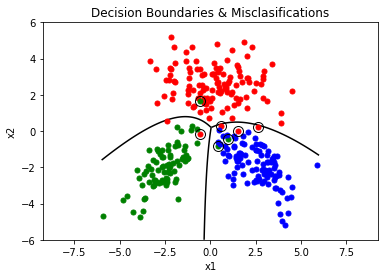

In [8]:
plt.plot(X[Y == 1, 0], X[Y == 1, 1], "r.", markersize = 10)
plt.plot(X[Y == 2, 0], X[Y == 2, 1], "g.", markersize = 10)
plt.plot(X[Y == 3, 0], X[Y == 3, 1], "b.", markersize = 10)
plt.plot(X[y_pred != Y, 0], X[y_pred != Y, 1], "ko", markersize = 10, fillstyle = "none")

x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)

res = C1 + C2 + C3
plt.contour(x1_grid, x2_grid, (C1 - C2), levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, (C1 - C3), levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, (C2 - C3), levels = 0, colors = "k")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundaries & Misclasifications")
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.axis('equal')
plt.show()